Представим ситуацию: Вы заказали базу у фрилансеров. Им необходимо было скачать с сайтов двух отелей анонимную базу данных обо всех клиентах. Фрилансеры выполнили заказ и прислали работу. Как оказалось, исходные данные очень загрязнены (пустыми колонками, неинформативными строками и т. д.), да еще и представлены в виде нескольких различных файлов. Главная задача на всё ДЗ - очистить базу и сохранить в виде одного документа.

Ссылка на файлы: 
https://drive.google.com/drive/folders/12aykvz02214Q_7eNMm3loXzOIDXfeZ4b?usp=sharing

Лучше сохранить на свой Google Диск

### Задание 1


Подключите Google Drive.

Откройте папку с файлами и сохраните каждый из них в виде Pandas DataFrame. 

**Подсказка 1**: получить список имен файлов можно при помощи библиотеки os, командой os.listdir (путь к папке с файлами). 

**Подсказка 2**: для сохранения всех файлов в виде Pandas DataFrame удобно использовать одну из структур данных Python.

Объедините все Pandas DataFrame в один.

**Решение:**

In [ ]:
import pandas as pd                     # Подключаем библиотеку pandas
import os                               # Подключаем библиотеку os

import matplotlib.pyplot as plt         # Подключаем библиотеку matplotlib
import seaborn as sns                   # Подключаем библиотеку seaborn
%matplotlib inline


In [ ]:
from google.colab import drive          # Подклчаем гугл диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = os.listdir(path="./drive/MyDrive/NU/03 Pandas/Ultra pro")        # С помощью функции listdir из библиотеки osполучаем список файлов из заданной папки и присваеваем этот список переменной data
data


['data1.csv',
 'data2.csv',
 'data6.csv',
 'data5.csv',
 'data8.csv',
 'data3.csv',
 'data4.csv',
 'data7.csv',
 'data10.csv',
 'data9.csv']

In [ ]:
data_list = []                                                                                 # Создаем пустой список data_list

for i in data:                                                                                 # Создаем цикл for и пробегаемся по всем объектам. Так как data итерируемый объект.
   new =  pd.read_csv('/content/drive/MyDrive/NU/03 Pandas/Ultra pro/'+ i, index_col = 0)      # Находясь в цикле, в переменную new заносим по одному структуры dataframe из файлов формата csv, с помощью функции read_csv
   data_list.append(new)                                                                       # Добавляем каждую структуру в новый список data_list

data_all = pd.concat (data_list)                                                               # С помощью функции concat объединяем все dataframe в один

# Выведем первые 5 строк для проверки. В функции использовали аргумент index_col = 1, что бы не было задвоение столбцов (использовали второй столбец каждого dataframe для индекса столбцов в общем датафрейм)
data_all.head()                               






,test_values,Unnamed: 2,for_notes,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,NaN,NaN,NaN,Resort Hotel,0.0,342.0,2015.0,July,NaN,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Resort Hotel,0.0,7.0,2015.0,July,NaN,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Resort Hotel,0.0,14.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
# Или можно добавить файлы вот так
dfs = []
for i in os.listdir ('/content/drive/MyDrive/NU/03 Pandas/Ultra pro'):
  print ("Добавляем файл:", i)
  dfs.append(pd.read_csv('/content/drive/MyDrive/NU/03 Pandas/Ultra pro/'+ i))

Добавляем файл: data1.csv
Добавляем файл: data2.csv
Добавляем файл: data6.csv
Добавляем файл: data5.csv
Добавляем файл: data8.csv
Добавляем файл: data3.csv
Добавляем файл: data4.csv
Добавляем файл: data7.csv
Добавляем файл: data10.csv
Добавляем файл: data9.csv


In [ ]:
df = pd.concat (dfs)
df.head()

,Unnamed: 0,test_values,Unnamed: 2,for_notes,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,NaN,NaN,NaN,Resort Hotel,0.0,342.0,2015.0,July,NaN,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,1,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,Resort Hotel,0.0,7.0,2015.0,July,NaN,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,3,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,Resort Hotel,0.0,14.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


### Задание 2

Хорошо бы понимать, с какими данными мы работаем. 

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Проверьте, выведя график, есть ли пропуски в данных. Оцените, насколько их много.

**Решение:**

In [ ]:
print ("Общая размерность объединенного DataFrame:",data_all.shape)             # Проверка общей размерности с помощью метода shape

# Или можно вывести отдельно число строк и число столбцов

print ("Число строк:",data_all.shape[0])
print ("Число столбцов:",data_all.shape[1])

print ("Общее число элементов",data_all.size)

Общая размерность объединенного DataFrame: (238780, 36)
Число строк: 238780
Число столбцов: 36
Общее число элементов 8596080


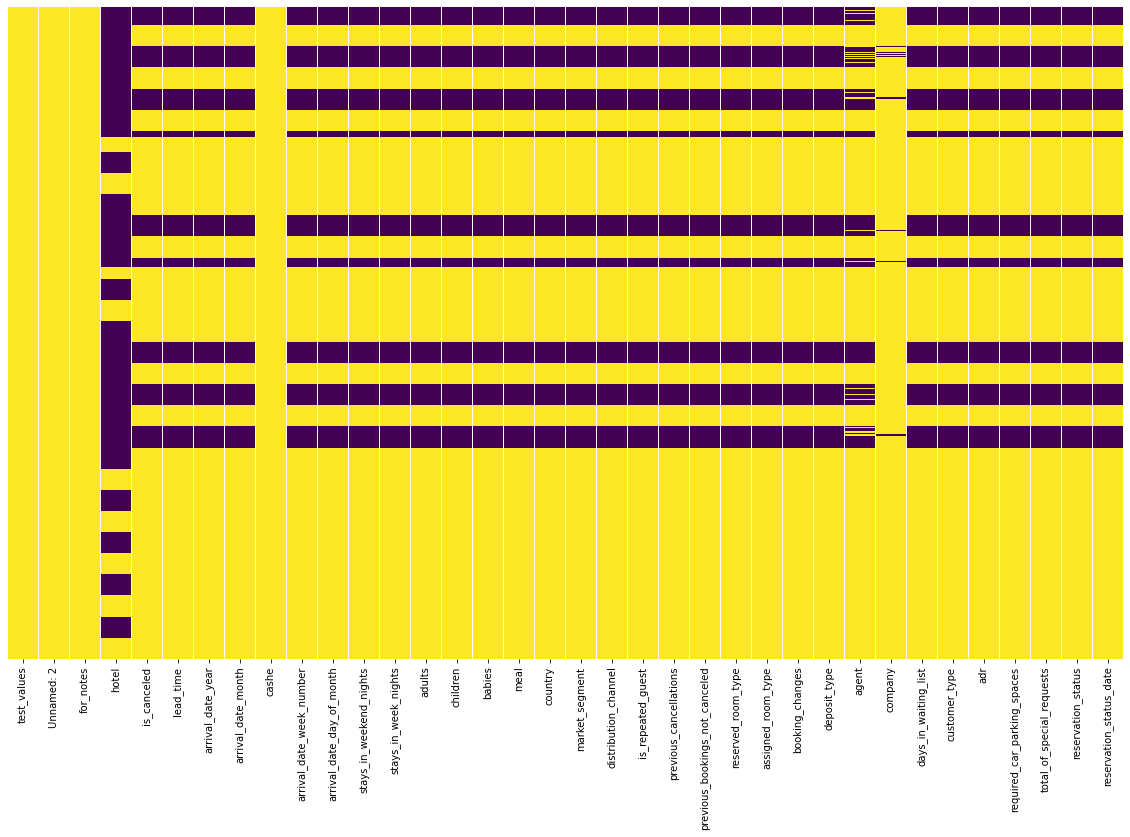

In [ ]:
# Посмотрим визуально на графике количество пропусков

fig, ax = plt.subplots (figsize=(20,12))                                                        # Создаем область под график
sns_heatmap = sns.heatmap(data_all.isnull(), yticklabels=False, cbar= False, cmap='viridis')    # Визуализируем пропуски

# Отображаем график
plt.show()                                                                                      

In [ ]:
# Проверим общее число пропусков в данных

print ("Общее количество пропусков в каждом столбце:\n\n", data_all.isna().sum())
print ("\nОбщее количество пропусков:", data_all.isna().sum().sum())

# Оценим на сколько много пропусков в процентах

proc = data_all.isna().sum().sum() / data_all.size
print ("\nОбщее количество пропусков в процентах: ",round(100 * proc, 1), '%', sep='')

Общее количество пропусков в каждом столбце:

 test_values                       238780
Unnamed: 2                        238780
for_notes                         238780
hotel                              59695
is_canceled                       179085
lead_time                         179085
arrival_date_year                 179085
arrival_date_month                179085
cashe                             238780
arrival_date_week_number          179085
arrival_date_day_of_month         179085
stays_in_weekend_nights           179085
stays_in_week_nights              179085
adults                            179085
children                          179087
babies                            179085
meal                              179085
country                           179329
market_segment                    179085
distribution_channel              179085
is_repeated_guest                 179085
previous_cancellations            179085
previous_bookings_not_canceled    179085
reserved_r

### Задание 3

Основываясь на выводах из предыдущего задания, очистите данные от пропусков.

**Подсказка**: очевидно, что есть полностью пустые столбцы, неинформативные строки с одним лишь значением "For notes:", пустая часть датасета внизу. После этих преобразований могут остаться пустые значения в датасете с хаотичным расположением (это допускается).

Если остались пропуски, заполните их словом "unknown".

**Решение:**

До удаления: (238780, 36)
После удаления: (179085, 32)

Общее количество пропусков стало: 3765811

Общее количество пропусков в процентах: 65.7%


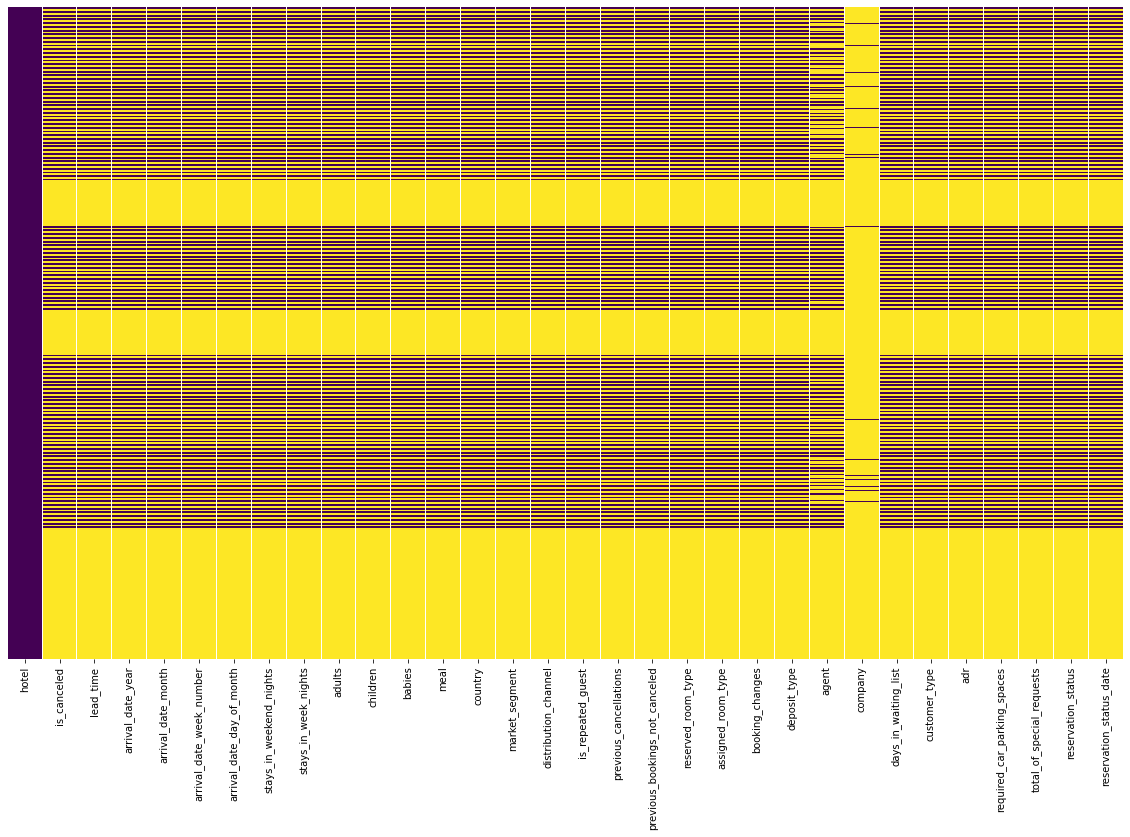

In [ ]:
#  Для начала удалим строки и столбцы в которых совсем нет данных с помощью метода dropna

print ("До удаления:",data_all.shape)
data_all.dropna(axis = 0, how = 'all', inplace = True)               # Удалим все пустые строки
data_all.dropna(axis = 1, how = 'all', inplace = True)               # Удалим все пустые столбцы
print ("После удаления:",data_all.shape)

print ("\nОбщее количество пропусков стало:", data_all.isna().sum().sum())

proc = data_all.isna().sum().sum() / data_all.size
print ("\nОбщее количество пропусков в процентах: ",round(100 * proc, 1), '%', sep='')


fig, ax = plt.subplots (figsize=(20,12))                                                        # Создаем область под график
sns_heatmap = sns.heatmap(data_all.isnull(), yticklabels=False, cbar= False, cmap='viridis')      # Визуализируем пропуски

# Отображаем график
plt.show()          


До удаления: (179085, 32)
После удаления: (59695, 32)

Общее количество пропусков стало: 64721

Общее количество пропусков в процентах: 3.4%


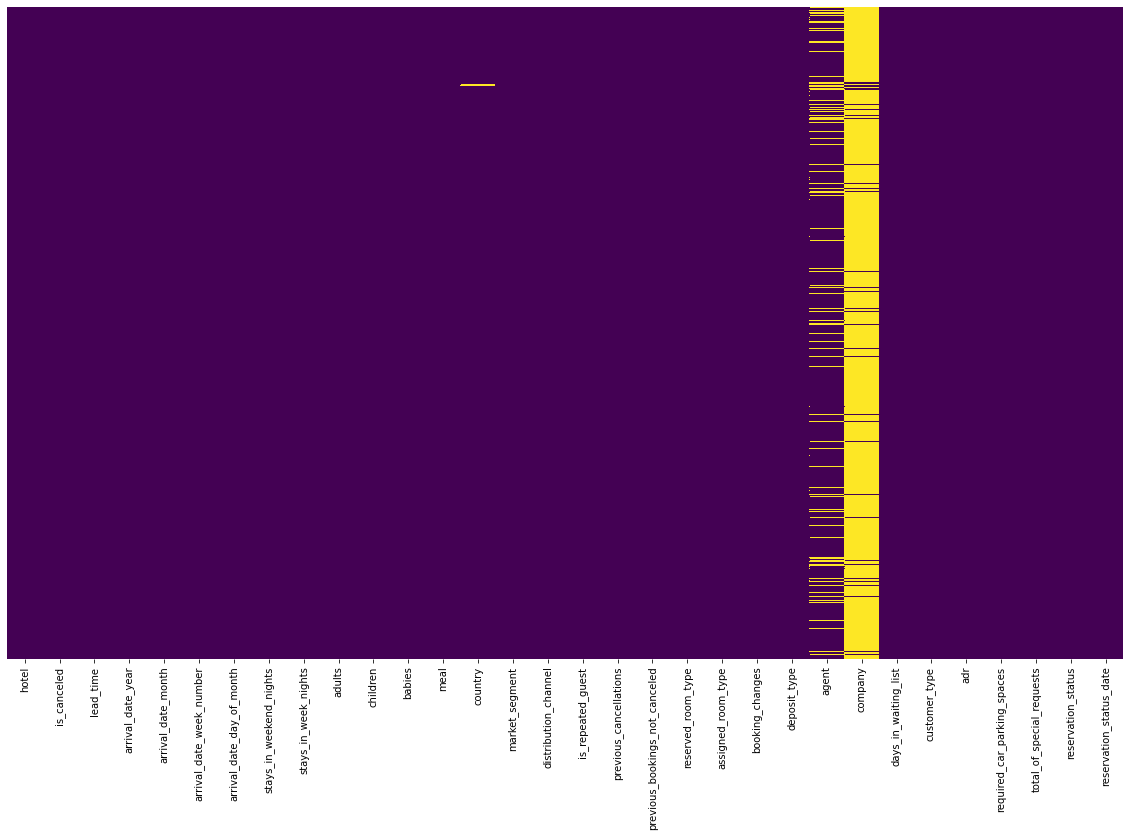

In [ ]:
# Удалим неинформативные строки с одним лишь значением "For notes:"

print ("До удаления:",data_all.shape)
data_all.dropna(axis = 0, thresh = 2, inplace = True)                         # Удаляем строки в которых только один заполненный элемент (все пустые кроме одного столбца)

print ("После удаления:",data_all.shape)

print ("\nОбщее количество пропусков стало:", data_all.isna().sum().sum())

proc = data_all.isna().sum().sum() / data_all.size
print ("\nОбщее количество пропусков в процентах: ",round(100 * proc, 1), '%', sep='')

fig, ax = plt.subplots (figsize=(20,12))                                                        # Создаем область под график
sns_heatmap = sns.heatmap(data_all.isnull(), yticklabels=False, cbar= False, cmap='viridis')      # Визуализируем пропуски

# Отображаем график
plt.show()


Общее количество пропусков стало: 0


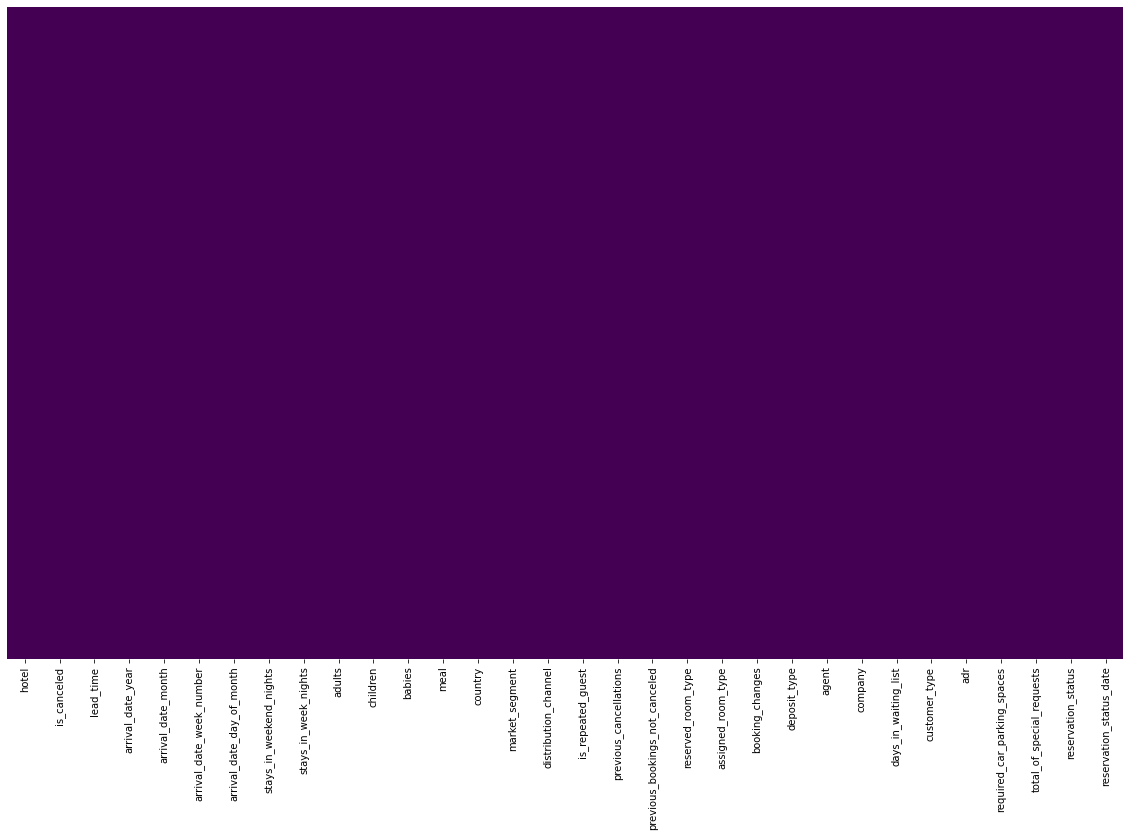

In [ ]:
# Заменим оставшиеся пропуски на слово "unknown"
data_all.fillna("unknown", inplace = True)                         
print ("\nОбщее количество пропусков стало:", data_all.isna().sum().sum())

fig, ax = plt.subplots (figsize=(20,12))                                                        # Создаем область под график
sns_heatmap = sns.heatmap(data_all.isnull(), yticklabels=False, cbar= False, cmap='viridis')      # Визуализируем пропуски

# Отображаем график
plt.show()

### Задание 4

Необходимо посмотреть, сколько всего записей есть в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц каждого года.

**Подсказка**: примените метод groupby для столбцов 'hotel', 'arrival_date_year', 'arrival_date_month'.

**Решение:**

In [ ]:
lead_time_count = data_all.groupby(['hotel', 'arrival_date_year', 'arrival_date_month' ]).count()                  # Применим метод groupby и создадим выборку из столбцов
print ("Всего записей в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц: ",lead_time_count["lead_time"].count())   # Подсчитаем количество элементов в столбце lead_time для выбранных столбцов
print ("")
print ("Общее количество записей в столбце lead_time:",lead_time_count["lead_time"].sum())
print ("")
lead_time_count["lead_time"]            # Отобразим выбранный столбец



Всего записей в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц:  52

Общее количество записей в столбце lead_time: 59695



hotel         arrival_date_year  arrival_date_month
City Hotel    2015.0             August                1235
                                 December               829
                                 July                   703
                                 November               617
                                 October               1696
                                 September             1767
              2016.0             April                 1781
                                 August                1689
                                 December              1242
                                 February              1179
                                 January                683
                                 July                  1560
                                 June                  1962
                                 March                 1529
                                 May                   1846
                                 November       

### Задание 5

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Сохраните получившийся DataFrame в одном файле.

**Решение:**

In [ ]:
print ("Общая размерность объединенного DataFrame:",data_all.shape)             # Проверка общей размерности с помощью метода shape

# Или можно вывести отдельно число строк и число столбцов

print ("Число строк:",data_all.shape[0])
print ("Число столбцов:",data_all.shape[1])

print ("Общее число элементов",data_all.size)

Общая размерность объединенного DataFrame: (59695, 32)
Число строк: 59695
Число столбцов: 32
Общее число элементов 1910240


In [ ]:
# Сохраним получившийся dataframe в новый файл 

data_all.to_csv('hotel.csv')      # В данной сессии colab появился файл, который находится /content/hotel.csv 

data_all.to_excel('hotel.xlsx')   # Так же данный dataframe можно сохранить в Excel

# Оба файла скачиваются на компьютер и открываются(читаются)